# Requirements

In [117]:
# Add as many imports as you need.
!pip install gdown==4.6.3

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the primary objective is to use Long Short-Term Memory (LSTM) networks for time series forecasting in order to predict the current **mean temperature** in the city of Delhi. To accomplish this use data from the past three days, which includes information such as the **mean temperature**, **humidity**, **wind speed**, and **mean pressure**. The goal is to employ LSTM, a type of recurrent neural network, to effectively forecast the future mean temperature based on the provided historical data.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

In [118]:
!gdown 1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC

Downloading...
From: https://drive.google.com/uc?id=1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC
To: /content/climate-data.csv
100% 78.1k/78.1k [00:00<00:00, 39.4MB/s]


## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [119]:
# Write your code here. Add as many boxes as you need.
import pandas as pd

df = pd.read_csv('/content/climate-data.csv')
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


Explore the dataset using visualizations of your choice.

In [120]:
# Write your code here. Add as many boxes as you need.

## Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

*Be careful when extracting the features. For each day, ensure that features are obtained sequentially, starting with those from 3 days ago, followed by features from 2 days ago, and finally, features from 1 day ago. This becomes crucial when reshaping the train and test sets later on.*

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [121]:
# Write your code here. Add as many boxes as you need.
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [122]:
# df.drop('date', axis=1, inplace=True)

# lag = 3

# for c in df.columns:
#   for i in range(lag, 0, -1):
#     df[f'{c}_prev_{i}'] = df[c].shift(i)

# df

columns = df.iloc[:,1:].columns

for i in range(3,0,-1):
  for column in columns:
    df[f'{column} {i} days ago'] = df[column].shift(i)

df

,date,meantemp,humidity,wind_speed,meanpressure,meantemp 3 days ago,humidity 3 days ago,wind_speed 3 days ago,meanpressure 3 days ago,meantemp 2 days ago,humidity 2 days ago,wind_speed 2 days ago,meanpressure 2 days ago,meantemp 1 days ago,humidity 1 days ago,wind_speed 1 days ago,meanpressure 1 days ago
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,84.500000,0.000000,1015.666667
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN,NaN,NaN,NaN,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,14.000000,94.300000,9.085000,1014.350000,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762,14.095238,89.666667,6.266667,1017.904762


In [123]:
for c in df.columns:
  if 'days ago' not in c and c != 'meantemp':
    df.drop(c, axis=1, inplace=True)

df

,meantemp,meantemp 3 days ago,humidity 3 days ago,wind_speed 3 days ago,meanpressure 3 days ago,meantemp 2 days ago,humidity 2 days ago,wind_speed 2 days ago,meanpressure 2 days ago,meantemp 1 days ago,humidity 1 days ago,wind_speed 1 days ago,meanpressure 1 days ago
0,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,84.500000,0.000000,1015.666667
2,7.166667,NaN,NaN,NaN,NaN,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000
3,8.666667,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667
4,6.000000,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,17.217391,14.000000,94.300000,9.085000,1014.350000,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000
1458,15.238095,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217
1459,14.095238,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762
1460,15.052632,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762,14.095238,89.666667,6.266667,1017.904762


In [124]:
df.isnull().sum()

meantemp                   0
meantemp 3 days ago        3
humidity 3 days ago        3
wind_speed 3 days ago      3
meanpressure 3 days ago    3
meantemp 2 days ago        2
humidity 2 days ago        2
wind_speed 2 days ago      2
meanpressure 2 days ago    2
meantemp 1 days ago        1
humidity 1 days ago        1
wind_speed 1 days ago      1
meanpressure 1 days ago    1
dtype: int64

In [125]:
df.dropna(axis=0, inplace=True)

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [126]:
# Write your code here. Add as many boxes as you need.
features = []

for c in df.columns:
  if 'days ago' in c:
    features.append(c)

features

['meantemp 3 days ago',
 'humidity 3 days ago',
 'wind_speed 3 days ago',
 'meanpressure 3 days ago',
 'meantemp 2 days ago',
 'humidity 2 days ago',
 'wind_speed 2 days ago',
 'meanpressure 2 days ago',
 'meantemp 1 days ago',
 'humidity 1 days ago',
 'wind_speed 1 days ago',
 'meanpressure 1 days ago']

In [127]:
X, Y  = df[features], df['meantemp']
X

,meantemp 3 days ago,humidity 3 days ago,wind_speed 3 days ago,meanpressure 3 days ago,meantemp 2 days ago,humidity 2 days ago,wind_speed 2 days ago,meanpressure 2 days ago,meantemp 1 days ago,humidity 1 days ago,wind_speed 1 days ago,meanpressure 1 days ago
3,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667
4,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667
5,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000
6,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000
7,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1457,14.000000,94.300000,9.085000,1014.350000,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000
1458,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217
1459,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762
1460,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762,14.095238,89.666667,6.266667,1017.904762


In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=False, test_size=0.1)

## Feauture Scaling
Scale the extracted features using an appropriate scaler.

In [129]:
# Write your code here. Add as many boxes as you need.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
Y_train = scaler.fit_transform(Y_train.values.reshape(-1, 1))

In [130]:
X_train.shape[1]

12

## Feature Reshaping

Reshape the feature dimensions into the shape `(samples, timesteps, features)`.

In [131]:
# Write your code here. Add as many boxes as you need.
X_train = X_train.reshape(X_train.shape[0], 3, X_train.shape[1] // 3)
X_test = X_test.reshape(X_test.shape[0], 3, X_test.shape[1] // 3)

## Long Short-Term Memory (LSTM) Network
Build a Long Short-Term Memory (LSTM) Network for forecasting the current **mean temperature** based on the extracted features from the previous three days.

Define the forecasting model using the **Keras Sequential API** (`keras.models.Sequential`), incorporating one or more LSTM layers along with additional relevant layers (`keras.layers`). Be cautious when specifying the configuration of the final layer to ensure proper model output for the forecasting task.

In [132]:
# Write your code here. Add as many boxes as you need.
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(100,  activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
# model.add(LSTM(50,  activation='relu', return_sequences=True))
model.add(LSTM(50,  activation='relu'))
model.add(Dense(1, activation='linear'))

Compile the previously defined model specifying **loss function** (`keras.losses`), **optimizer** (`keras.optimizers`) and **evaluation metrics** (`keras.metics`).

In [133]:
# Write your code here. Add as many boxes as you need.
model.compile(loss=keras.losses.MeanSquaredError() , optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError() ])

Train the model on the training set, specifying the **batch size** and **number of epochs** for the training process. Allocate 20% of the samples for **validation**, and ensure that the dataset remains **unshuffled** during training.

In [134]:
# Write your code here. Add as many boxes as you need.
history = model.fit(X_train, Y_train, batch_size=16, validation_split=0.2, epochs=20, shuffle=False)

Epoch 1/20
66/66 [==============================] - 6s 37ms/step - loss: 0.1563 - mean_squared_error: 0.1563 - mean_absolute_error: 0.3232 - val_loss: 0.0357 - val_mean_squared_error: 0.0357 - val_mean_absolute_error: 0.1621
Epoch 2/20
66/66 [==============================] - 2s 27ms/step - loss: 0.0269 - mean_squared_error: 0.0269 - mean_absolute_error: 0.1329 - val_loss: 0.0085 - val_mean_squared_error: 0.0085 - val_mean_absolute_error: 0.0731
Epoch 3/20
66/66 [==============================] - 2s 31ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - mean_absolute_error: 0.0628 - val_loss: 0.0055 - val_mean_squared_error: 0.0055 - val_mean_absolute_error: 0.0577
Epoch 4/20
66/66 [==============================] - 3s 39ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - mean_absolute_error: 0.0546 - val_loss: 0.0059 - val_mean_squared_error: 0.0059 - val_mean_absolute_error: 0.0612
Epoch 5/20
66/66 [==============================] - 2s 36ms/step - loss: 0.0058 - mean_squared_error

Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

In [135]:
# Write your code here. Add as many boxes as you need.

Use the trained model to make predictions for the test set.

In [140]:
# Write your code here. Add as many boxes as you need.
preds = model.predict(X_test)
preds = scaler.inverse_transform(preds)

5/5 [==============================] - 0s 5ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [141]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mean_squared_error(preds, Y_test), mean_absolute_error(preds, Y_test), r2_score(preds, Y_test)

(3.0521749881563913, 1.3769820228058283, 0.8682210204817639)

Create a line plot in order to compare the actual and predicted mean temperatures for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to perform a sentiment analysis on a dataset consisting of wine reviews. The dataset contains two attributes: **description** and **points**. The description is a brief text describing the wine and the points which represents a quality metric ranging from 1 to 100. If some wine has at least 90 points it is considered **exceptional**. Your task involves predicting if some wine is exceptional based on its review.

The greater part of the code for the solution is already given. You need to define a tokenizer to tokenize the given texts and a deep neural network model that will be used for the classification task at hand. Fill in only the missing code blocks.

## Requirements

In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Downloading the Wine Reviews Dataset

In [143]:
!gdown 1fz9449M9Owofy6CYrKzkGwXKesI32B8u

Downloading...
From: https://drive.google.com/uc?id=1fz9449M9Owofy6CYrKzkGwXKesI32B8u
To: /content/wine-reviews.csv
100% 32.5M/32.5M [00:00<00:00, 199MB/s]


## Exploring the Climate Dataset

Load the dataset into a `pandas` data frame.

In [176]:
df = pd.read_csv('wine-reviews.csv')

In [177]:
df.head()

,description,points
0,"Aromas include tropical fruit, broom, brimston...",87
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87


## Feature Extraction

Extract the feature `exceptional` for each wine review.

In [178]:
df['exceptional'] = df['points'].apply(lambda elem: 1 if elem >= 90 else 0)

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [179]:
X, y = df['description'], df['exceptional']

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Text Tokenization

Use tokenizer to convert raw text into a sequence of tokens.

In [181]:
# Write your code here. Add as many boxes as you need.
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

max_tokens = 20000

tokenizer = Tokenizer(num_words=max_tokens)
tokenizer.fit_on_texts(X_train.values)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

## Padding
Pad each sequence to maximum length of 16.

In [182]:
# Write your code here. Add as many boxes as you need.
maxlen=16

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [183]:
X_train.shape, X_test.shape

((103976, 16), (25995, 16))

In [184]:
num_classes=1

## Deep Neural Network

Define Deep Neural Network model to predict if a specific wine is exceptional or not based on the tokenized and padded wine reviews.

In [185]:
# Write your code here. Add as many boxes as you need.
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import confusion_matrix, classification_report

model = Sequential()
model.add(Embedding(max_tokens, 32, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Compile the previously defined model specifying loss function, optimizer and evaluation metrics.

In [188]:
# Write your code here. Add as many boxes as you need.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Fit the compiled model on the train set specifying the percent for validation, batch_size, and number of epochs.

In [192]:
# Write your code here. Add as many boxes as you need.
model_history = model.fit(X_train, y_train,  epochs=5, batch_size=128, verbose=2, validation_split=0.2)

Epoch 1/5
650/650 - 40s - loss: 0.5000 - accuracy: 0.7480 - val_loss: 0.4461 - val_accuracy: 0.7835 - 40s/epoch - 62ms/step
Epoch 2/5
650/650 - 14s - loss: 0.4135 - accuracy: 0.8069 - val_loss: 0.4458 - val_accuracy: 0.7898 - 14s/epoch - 22ms/step
Epoch 3/5
650/650 - 14s - loss: 0.3729 - accuracy: 0.8295 - val_loss: 0.4585 - val_accuracy: 0.7853 - 14s/epoch - 21ms/step
Epoch 4/5
650/650 - 16s - loss: 0.3247 - accuracy: 0.8549 - val_loss: 0.4963 - val_accuracy: 0.7854 - 16s/epoch - 24ms/step
Epoch 5/5
650/650 - 13s - loss: 0.2717 - accuracy: 0.8817 - val_loss: 0.5131 - val_accuracy: 0.7810 - 13s/epoch - 20ms/step


Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

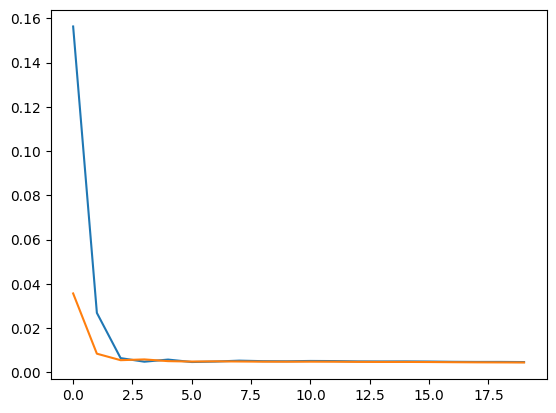

In [193]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.show()

Use the trained model to make predictions for the test set.

In [194]:
y_pred = model.predict(X_test)

813/813 [==============================] - 3s 4ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [195]:
print(classification_report(y_test, np.round(y_pred)))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     16304
           1       0.73      0.67      0.70      9691

    accuracy                           0.78     25995
   macro avg       0.77      0.76      0.76     25995
weighted avg       0.78      0.78      0.78     25995

